## 00_Get [data](https://www.kaggle.com/c/dogs-vs-cats/data) and import module

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from skimage.transform import resize
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import time

## 01_Cats and Dogs datas

In [3]:
path = "../data/dogs-vs-cats/train/"
os.listdir(path)

['cat.9359.jpg',
 'dog.9981.jpg',
 'dog.5914.jpg',
 'cat.8094.jpg',
 'dog.3766.jpg',
 'cat.2387.jpg',
 'cat.4828.jpg',
 'dog.6611.jpg',
 'cat.11538.jpg',
 'cat.11427.jpg',
 'dog.2224.jpg',
 'dog.1385.jpg',
 'dog.4312.jpg',
 'dog.9637.jpg',
 'cat.9847.jpg',
 'cat.3863.jpg',
 'cat.16.jpg',
 'cat.2746.jpg',
 'dog.407.jpg',
 'dog.2570.jpg',
 'cat.6539.jpg',
 'cat.6738.jpg',
 'cat.5767.jpg',
 'dog.10888.jpg',
 'cat.7926.jpg',
 'cat.9009.jpg',
 'dog.8078.jpg',
 'dog.4178.jpg',
 'dog.11855.jpg',
 'cat.10389.jpg',
 'cat.4735.jpg',
 'dog.897.jpg',
 'cat.6771.jpg',
 'dog.10007.jpg',
 'dog.7392.jpg',
 'dog.2808.jpg',
 'dog.806.jpg',
 'dog.10817.jpg',
 'dog.5715.jpg',
 'dog.9272.jpg',
 'cat.7824.jpg',
 'dog.8497.jpg',
 'cat.3108.jpg',
 'cat.1940.jpg',
 'dog.5234.jpg',
 'cat.3560.jpg',
 'cat.7059.jpg',
 'cat.6340.jpg',
 'dog.8536.jpg',
 'dog.1575.jpg',
 'cat.1026.jpg',
 'dog.4108.jpg',
 'cat.7718.jpg',
 'dog.4946.jpg',
 'dog.10047.jpg',
 'cat.10245.jpg',
 'dog.6769.jpg',
 'cat.5293.jpg',
 'cat.2444

In [4]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

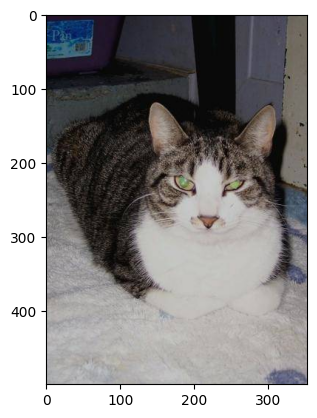

In [5]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [6]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(359, 480, 3)

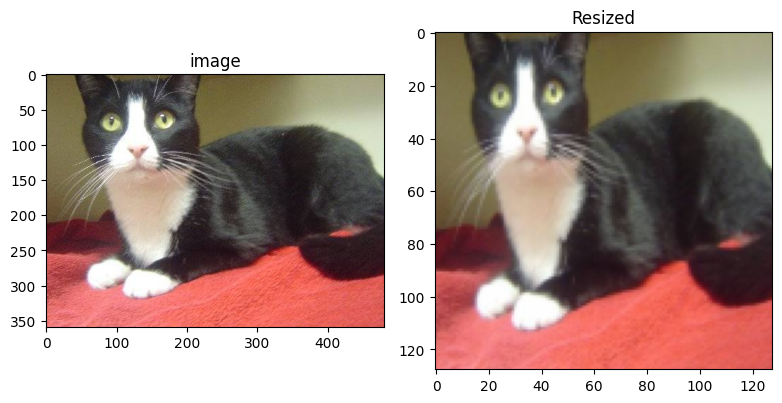

In [7]:
resized = resize(image, (128,128,3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

### resizing

In [8]:
images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (32, 32, 3)))

images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [9]:
images.shape, labels[:3]

((25000, 32, 32, 3), ['cat', 'dog', 'dog'])

In [10]:
images[:3]

array([[[[0.4563941 , 0.57000328, 0.87624767],
         [0.48659239, 0.59757322, 0.85490043],
         [0.53216529, 0.64537665, 0.88419432],
         ...,
         [0.28106709, 0.36947521, 0.60878036],
         [0.34293265, 0.410395  , 0.60400367],
         [0.49201957, 0.46366535, 0.44916679]],

        [[0.44511955, 0.55873267, 0.86496002],
         [0.48920405, 0.60021165, 0.85752902],
         [0.51984484, 0.63306314, 0.87186561],
         ...,
         [0.2814558 , 0.36410668, 0.60540132],
         [0.34860347, 0.40132347, 0.58285589],
         [0.52412544, 0.48090861, 0.45611673]],

        [[0.44048914, 0.55465373, 0.85864144],
         [0.4845684 , 0.59888563, 0.85514046],
         [0.51135304, 0.62540133, 0.86244864],
         ...,
         [0.2848038 , 0.35860153, 0.5919004 ],
         [0.33312812, 0.36915953, 0.52066683],
         [0.54889452, 0.4953226 , 0.45884378]],

        ...,

        [[0.4359531 , 0.29414756, 0.3074337 ],
         [0.4086862 , 0.29114751, 0.33209996]

01.01_label incoding

In [11]:
encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_ 

(array([0, 1, 1]), array(['cat', 'dog'], dtype='<U3'))

01.02 split data

In [12]:
X_train, X_test, y_train, y_test =\
      train_test_split(images, labels_encoded, test_size=0.2,
                       random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((20000, 32, 32, 3), (5000, 32, 32, 3))

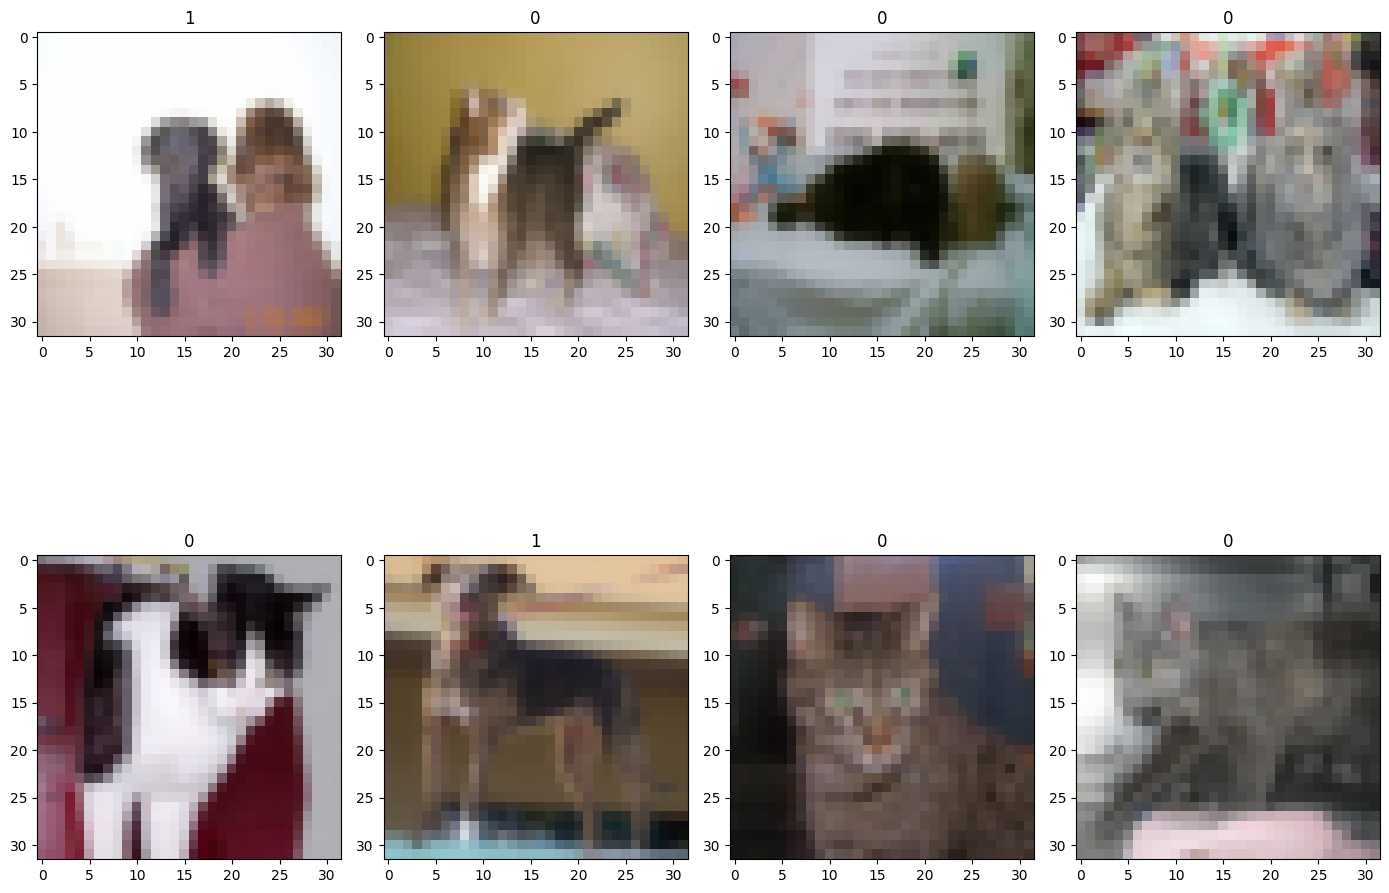

In [13]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys',
               interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

01.03_model

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')

])

model.summary()

/home/jhj/venv/DL_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-13 21:05:55.779125: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 21:05:55.802921: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testi

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,770 (1.35 MB)

 Trainable params: 352,770 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
start_time = time.time()
hist = model.fit(X_train.reshape(20000,32,32,3), y_train,
                 epochs=5, verbose=1,
                 validation_data = (X_test.reshape(5000,32,32,3), y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/5


2024-05-13 21:19:35.900794: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
2024-05-13 21:19:36.013476: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.
I0000 00:00:1715602777.008282   56483 service.cc:145] XLA service 0x7311a0003e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715602777.008303   56483 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-13 21:19:37.058067: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-13 21:19:37.227143: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 81/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5216 - loss: 0.6979

I0000 00:00:1715602781.626843   56483 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


602/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5579 - loss: 0.6783

2024-05-13 21:19:42.864190: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2024-05-13 21:19:42.896053: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5597 - loss: 0.6774 - val_accuracy: 0.6922 - val_loss: 0.5931
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6878 - loss: 0.5902 - val_accuracy: 0.7232 - val_loss: 0.5546
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7165 - loss: 0.5548 - val_accuracy: 0.7514 - val_loss: 0.5191
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7366 - loss: 0.5198 - val_accuracy: 0.7616 - val_loss: 0.4937
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7557 - loss: 0.4972 - val_accuracy: 0.7770 - val_loss: 0.4753
fit time :  13.113571166992188


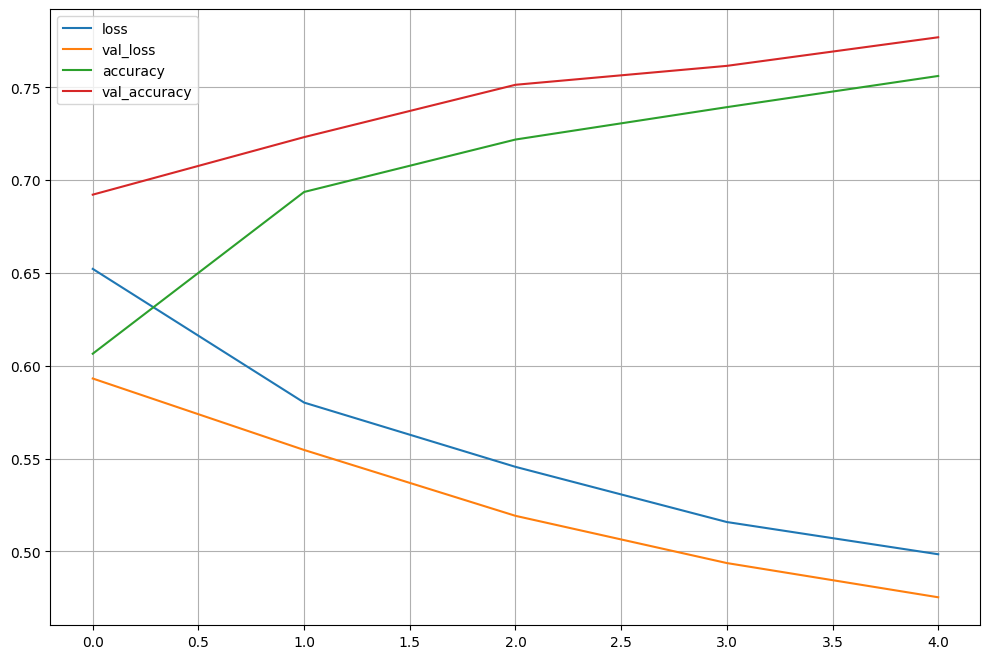

In [18]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()